# Assigment 4

# This is a mini-project assignment that includes only programming questions. You are asked to implement optimization algorithms for ML classification problems. 

## Marking of this assignment will be based on the correctness of your ML pipeline and efficiency of your code. 

## Upload your code on Learn dropbox and submit pdfs of the code and to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

In [1]:
# !pip install numpy, scipy, sys

## Suggested way of loading data to python for the assigment. There are alternatives of course, you can use your preferred way if you want.

In [2]:
# Download the LIBSVM package from here: https://www.csie.ntu.edu.tw/~cjlin/libsvm/#download 
# If your download is successfull you should have the folder with name: libsvm-3.24.
# We will use this package to load datasets. 

# Enter the downloaded folder libsvm-3.24 through your terminal. 
# Run make command to compile the package.

# Load this auxiliary package.
import sys
import os
# add here your path to the folder libsvm-3.24/python
path = os.getcwd()+'/libsvm-3.24/python/'

print(os.getcwd())
# Add the path to the Python paths so Python can find the module.
sys.path.append(path)
# sys.path.append(os.getcwd()+'/libsvm-3.24/')
# sys.path.append(os.getcwd()+'/libsvm-3.24/python/')
print(path)


# Load the LIBSVM module.
from svmutil import *

# Add here your path to the folder libsvm-3.24
path = './libsvm-3.24/heart_scale'

# Test that it works. This will load the data "heart_scale" 
# and it will store the labels in "b" and the data matrix in "A".
b, A = svm_read_problem(path)

# Use "svm_read_problem" function to load data for your assignment.

# Note that matrix "A" stores the data in a sparse format. 
# In particular matrix "A" is a list of dictionaries. 
# The length of the list gives you the number of samples.
# Each entry in the list is a dictionary. The keys of the dictionary are the non-zero features.
# The values of the dictionary for each key is a list which gives you the feature value.

/home/ned/Desktop/CS794/A4
/home/ned/Desktop/CS794/A4/libsvm-3.24/python/


## Load other useful modules

In [3]:
# Numpy is useful for handling arrays and matrices.
import numpy as np
import matplotlib.pyplot as plt

# my import 
from numpy.linalg import norm
import math, random, time, random
from scipy import real, ndimage
from scipy.sparse import *
from sklearn.feature_extraction import DictVectorizer
from  scipy.sparse.linalg import expm

## Datasets that you will need for this assignment.

In [4]:
# There is an extended selection of classification and regression datasets 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

# Out of all these datasets you will need the following 3 datasets, which are datasets for classification problems.
# 
# a9a dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#a9a 
# This dataset is small, it is recommened to start your experiments with this dataset.
#
# news20.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#news20.binary
#
# covtype.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#covtype.binary
#
# Exploit the sparsity of the problem when you implement optimization methods.

## Training, Validation and Testing data

In [5]:
# All datasets above consist of training and testing data. 

# You should seperate the training data into training and validation data.
# Follow the instructions from the lectures about how you can use both training and validation data.
# You can use 10% of the training data as validation data and the remaining 90% to train the models.
# This is a suggested percentage, you can do otherwise if you wish.

# Do not use the testing data to influence training in any way. Do not use the testing data at all.
# Only your instructor and TA will use the testing data to measure generalization error. 
# If you do use the testing data to tune parameters or for training of the algorithms we will figure it out :-). 

## Optimization problems

### You need to solve the following optimization problems 

Hinge-loss
$$\mbox{minimize}_{x\in\mathbb{R}^d, \beta \in \mathbb{R}} \ \frac{1}{n} \sum_{i=1}^n \max \{0,1-b_i(a_i^Tx + \beta)\},$$
where $a_i\in\mathbb{R}^d$ is the feature vector for sample $i$ and $b_i$ is the label of sample $i$. The sub-gradient of the hinge-loss is given in the lecture slides (note that there is a small difference due to the intercept $\beta$). A smooth approximation of the function $f(z):=\max\{0,1-z\}$ is given by
$$
\psi_\mu(z) = 
\begin{cases}
0 & z\ge 1\\
(1-z)^2 & \mu < z < 1 \\
(1-\mu)^2 + 2(1-\mu)(\mu-z) & z \le \mu.
\end{cases}
$$
You can use the smooth approximation $\psi_\mu(z)$ for methods that work only for smooth functions. For sub-gradient methods you should use the sub-gradient.

L2-regularized logistic regression
$$\mbox{minimize}_{x\in\mathbb{R}^d,\beta\in\mathbb{R}} \ \lambda \|x\|_2^2 + \frac{1}{n} \sum_{i=1}^n \log (1+ \exp(-b_i(a_i^Tx + \beta))).$$
This is a smooth objective function, therefore, you should use gradient methods to solve it. You do not need sub-gradient methods for this problem.

## Optimization algorithms

In [6]:
# For this assignment you will need the following methods

# 1) Stochastic sub-gradient
# 2) Stochastic gradient
# 3) Mini-batch (sub-)gradient (you will have to decide what batching strategy to use, see lecture slides)
# 4) Stochastic average sub-gradient (SAG)
# 5) Stochastic average gradient (SAG)
# 6) Gradient descent with Armijo line-search
# 7) Acceleratd gradient with Armijo line-search (the same method as Q5 in Assignemnt 3)

# Information is provided in the lecture slides about parameter tuning and termination.
# However, the final decision of any parameter tuning and termination criteria is up to the students to make. 

## Validation error: measure the validation error by calculating
$$
\frac{1}{t}\sum_{i\in\mbox{validation data}} \left| \ b_i^{\mbox{your model}} - b_i^{\mbox{true}} \ \right|
$$
where $t$ is the number of samples in your validation set. $b_i^{\mbox{true}}$ is the true label of the $i$-th sample. $b_i^{\mbox{your model}}$ is the label of the $i$-th sample of your model.

For hinge loss calculate $$b_i^{\mbox{your model}}:= \mbox{sign}(a_i^Tx + \beta).$$

For logistic regression calculate the predicted label by
$$
b_i^{\mbox{your model}}=
\begin{cases}
1 & \mbox{if } \frac{1}{1+e^{-(a_i^Tx + \beta)}} > 0.5\\
-1 & \mbox{otherwise}
\end{cases}
$$

## Question 1: Use the ML pipeline that is mentioned in slide 60 of Lecture 11 to train your model for the logistic regression problem (the hinge-loss problem does not have any hyper-parameters). Pick any algorithm that you want from the above suggested list to train the models. Report your ML pipeline. Print your Generalization Error. We will not measure running time for this pipeline. Running time will be measure only in Q2. Marks: 30.

## Question 2: Plot the objective function (y-axis) vs running time in sec (x-axis). Have one plot for each optimization problem. In each plot show the performance of all relevant algorithms. For each plot use the parameter setting that gives you the best validation error in Q1 (this refers to the logistic regression probelm). Do not show plots for all parameter settings that you tried in Q1, only for the one that gives you the smallest validation error. Do not include computation of any plot data in the computation of the running time of the algorithm, unless the plot data are computed by the algorithm anyway. Make sure that the plots are clean and use appropriate legends. Note that we should be able to re-run the code and obtain the plots. Marks: 70.

### For this question, we will measure the running time of your stochastic sub-gradient method for the sparse dataset news20.binary for the hinge-loss problem. We will not measure the running time of any other combination of algorithm, dataset, problem. You need to implement the stochastic sub-gradient method and encapsulate it in a python class.

To make sure your object can be used by our script, your class should have two methods:

1. <strong>fit(self, train_data, train_label)</strong>. It will use stochastic sub-gradient method to minimize the hinge loss and store the optimized coefficients (i.e. $x, \beta$) in the instance. The "train_data" and "train_label" are similar to the output of "svm_read_problem". 
    * "train_data" is a list of $n$ python dictionaries (int -> float), which presents a sparse matrix. The keys (int) and values (float) in the dictionary at train_data[i] are the indices (int) and values (float) of non-zero entries of row $i$. 
    * "train_label" is a list of $n$ integers, it only has <strong>-1s and 1s</strong>. $n$ is the number of samples.  This function returns nothing.


2. <strong>predict(self, test_data)</strong>. It will predict the label of the input "test_data" by using the coefficients stored in the instance. The "test_data" has the same data structure as the "train_data" of the "fit" function. This function returns a list of <strong>-1s and 1s</strong> (i.e. the prediction of your labels).

You can also define other methods to help your programming, we will only call the two methods decribed above.

To let us import your class, you need to follow these rules:

1. You should name your python file by <strong>a4_[your student ID].py</strong>. For example, if your student id is 12345, then your file name is <strong>a4_12345.py</strong>
1. Your object name should be <strong>MyMethod</strong> (it's case sensitive).

Any violation of the above requirements will get error in our script and you will get at most 50% of the total score. Your solution will be mainly measured by the runing time of the <strong>fit</strong> function and the accuracy of the <strong>predict</strong> function. For example your method will be called and measured in following pattern:

    obj = MyMethod()
    st = time.time()
    obj.fit(train_data, train_label) # .fit() optimizes the objective and stores coefficients in obj.
    running_time = time.time() - st
    predict_label = obj.predict(test_data)
    accuracy = get_accuracy(predict_label, test_label) # this is a function we use to measure accuracy.
Then your accuracy will be measured by <strong>predict_labels</strong>, you don't have to implement "get_accuracy". When you finish your implementation, upload the .py file to Learn dropbox.

In [7]:
########################################################################
# Read from a9a
########################################################################
from svmutil import *

# A is a list of Dictionary, b is a list of int. 
b,A = svm_read_problem(os.getcwd()+'/a9a')
# set feature (# of columns of A)
features = 123
vec = DictVectorizer()
A_matrix = A_matrix = vec.fit_transform(A).tocsr()
b_matrix = csr_matrix(np.array(b).reshape(len(b),1), shape=(len(b),1))

# shuffle matrix
from sklearn.utils import shuffle
A_shuffled, b_shuffled = shuffle(A_matrix,b_matrix)

# Ax+beta = b, adding one column of one to A and append beta to x
A = hstack((A_shuffled, csr_matrix(np.ones(shape=(A_shuffled.shape[0],1), dtype=float), shape=(len(b),1)))).tocsr()
# x_ = csr_matrix(np.ones(shape=(features+1,1), dtype=float), shape=(features+1,1)) # features +1 = [x+beta]
x0 = np.ones(shape=(features+1,1), dtype=float)

# A is sparse matrix, x is ndarray, b is ndarray
b = b_shuffled.toarray()
# print('original types\t',type(A),type(x),type(b_))
# print('original shapes\t',A.shape,x.shape,b.shape)

# 90% training and 10% testing
A_training = A[:int(0.9*A.shape[0])]
b_training = b[:int(0.9*b.shape[0])]
A_testing = A[int(0.9*A.shape[0]):]
b_testing = b[int(0.9*b.shape[0]):]

In [8]:
########################################################################
# Read from covtype
########################################################################

import sys
import os
# add here your path to the folder libsvm-3.24/python


# Add the path to the Python paths so Python can find the module.

# sys.path.append(os.getcwd()+'/libsvm-3.24/')
# sys.path.append(os.getcwd()+'/libsvm-3.24/python/')

from svmutil import *

# A is a list of Dictionary, b is a list of int. 
b_cov,A_cov = svm_read_problem(os.getcwd()+'/covtype.libsvm.binary.scale')
# set feature (# of columns of A)
features_cov = 54
vec = DictVectorizer()
A_cov_matrix = A_cov_matrix = vec.fit_transform(A_cov).tocsr()
b_cov_matrix = csr_matrix(np.array(b_cov).reshape(len(b_cov),1), shape=(len(b_cov),1))

# shuffle matrix
from sklearn.utils import shuffle
A_cov_shuffled, b_cov_shuffled = shuffle(A_cov_matrix,b_cov_matrix)

# Ax+beta = b, adding one column of one to A and append beta to x
A_cov = hstack((A_cov_shuffled, csr_matrix(np.ones(shape=(A_cov_shuffled.shape[0],1), dtype=float), shape=(len(b_cov),1)))).tocsr()
# x_ = csr_matrix(np.ones(shape=(features+1,1), dtype=float), shape=(features+1,1)) # features +1 = [x+beta]
x0_cov = 0.01*np.ones(shape=(features_cov+1,1), dtype=float)

# A is sparse matrix, x is ndarray, b is ndarray
b_cov = b_cov_shuffled.toarray()
b_cov = np.where(b_cov==1,-1,b_cov) # 1->-1
b_cov = np.where(b_cov==2,1,b_cov) # 2->1

# 90% training and 10% testing
A_cov_training = A_cov[:int(0.9*A.shape[0])]
b_cov_training = b_cov[:int(0.9*b.shape[0])]
A_cov_testing = A_cov[int(0.9*A.shape[0]):]
b_cov_testing = b_cov[int(0.9*b.shape[0]):]
print(A_cov.shape,x0_cov.shape,b_cov.shape)


(581012, 55) (55, 1) (581012, 1)


In [9]:
########################################################################
# Read from news20
########################################################################
# Numpy is useful for handling arrays and matrices.
import numpy as np
import matplotlib.pyplot as plt

# my import 
from numpy.linalg import norm
import math, random, time, random
from scipy import real, ndimage
from scipy.sparse import *
from sklearn.feature_extraction import DictVectorizer
from  scipy.sparse.linalg import expm

from svmutil import *

# A is a list of Dictionary, b is a list of int. 
b_news,A_news = svm_read_problem(os.getcwd()+'/news20.binary')
# set feature (# of columns of A)
features_news = 1355191
vec = DictVectorizer()
A_news_matrix = A_news_matrix = vec.fit_transform(A_news).tocsr()
b_news_matrix = csr_matrix(np.array(b_news).reshape(len(b_news),1), shape=(len(b_news),1))

# shuffle matrix
from sklearn.utils import shuffle
A_news_shuffled, b_news_shuffled = shuffle(A_news_matrix,b_news_matrix)

# Ax+beta = b, adding one column of one to A and append beta to x

# print(A_news_shuffled.shape, b_news_shuffled.shape )
A_news = hstack((A_news_shuffled, np.ones(shape=(A_news_shuffled.shape[0],1), dtype=float))).tocsr()

# x_ = csr_matrix(np.ones(shape=(features+1,1), dtype=float), shape=(features+1,1)) # features +1 = [x+beta]
x0_news = 0.01*np.ones(shape=(features_news+1,1), dtype=float)

# A is sparse matrix, x is ndarray, b is ndarray
b_news = b_news_shuffled.toarray()
b_news = np.where(b_news==1,-1,b_news) # 1->-1
b_news = np.where(b_news==2,1,b_news) # 2->1

# 90% training and 10% testing
A_news_training = A_news[:int(0.9*A.shape[0])]
b_news_training = b_news[:int(0.9*b.shape[0])]
A_news_testing = A_news[int(0.9*A.shape[0]):]
b_news_testing = b_news[int(0.9*b.shape[0]):]
print(A_news.shape,x0_news.shape,b_news.shape)

(19996, 1355192) (1355192, 1) (19996, 1)


In [10]:
########################################################################
# Question 1
########################################################################
###################################################################################################
# L2 logistic regression loss functin
#  gradient of loss function
###################################################################################################


# def get_regression_loss(A,x,b, lambda_):
#     bs = hstack([b]*A.shape[1])
#     t = -1*b.multiply((A.dot(x)))  #-bi(ai.x +b)
#     e=t.expm1()
#     deno = (csr_matrix(np.ones(shape=(b.shape[0],b.shape[1])),shape=(b.shape[0],b.shape[1])) + e).log1p()
#     loss = lambda_* norm(x.toarray(),2)**2 + deno.mean(0)[0,0]
#     return loss

# # same as get_regression_loss
def get_regression_loss(A, x, b, lambda_):
    loss = lambda_ * np.sum(np.square(x)) + 1/b.shape[0] * np.sum(np.log(1 + np.exp(-b * A.dot(x))))
    return loss



def get_regression_gradient(A,x,b,lambda_):
    s= time.time()
    norm_grad = 2*lambda_*x
    b = b.toarray()
    A_dot_x = (A.dot(x).toarray())
    e = np.exp(-1*A_dot_x*b)
    coef = csr_matrix(e/(1+e))
    biai = -1*A.multiply(b)
    g_i = coef.multiply(biai)
    sigma_grad = np.asarray(g_i.mean(0).transpose())
    grad = norm_grad+sigma_grad
    return csr_matrix(grad)

# same as get_regression_gradient
def get_regression_gradient(A,x,b,lambda_):
    s= time.time()
    grad_reg = 2* lambda_ * x
#     print(grad_reg.shape)
    grad_loss = (1/b.shape[0] * np.sum(A.multiply((-b/(np.exp(b * A.dot(x)) + 1))), axis = 0)).transpose()
#     print(grad_loss.shape)
    grad = np.array(grad_reg) + np.array(grad_loss)
    return grad

In [11]:
######################################################################################################
# objective function and gradient of hinge_loss(smoothed)
######################################################################################################

def get_hingeloss_smooth(A,x,b, mu):
    z =  A.dot(x)*b
    # z>=1
    phi_z = np.where(z >= 1, 0, (1-z)**2)
    # mu<z<1
    phi_z = np.where(z <= mu, (1-mu)**2 + 2*(1-mu)*(mu - z), phi_z) 
    loss = np.average(phi_z)
    return loss

def get_hingeloss_smooth_gradient(A, x, b, mu):
    z = b * A.dot(x)
    z_mat = np.repeat(z, A.shape[1], axis = 1)
    grad_mid = A.multiply(-2*(1 - z)*b).todense()
    grad_low = A.multiply(-2*(1 - mu)*b).todense()
    grad = np.zeros(A.shape)
    grad = np.where(z >=1, grad, grad_mid)
    grad = np.where(z <= mu, grad_low, grad)
    grad = np.average(grad, axis = 0).reshape(x.shape)
#     print(type(grad))  numpy.ndarray
    return grad

# print(get_hingeloss_smooth(A_training,x,b_training,0.05)) #mu=0.05
# # print('----------------')
# print(get_gradient_hingeloss_smooth(A_training,x,b_training,0.01)) # lambda = 0.01

In [12]:
######################################################################################################
# objective function and gradient of hinge_loss(nonsmoothed)
######################################################################################################
def get_hingeloss_nonsmooth(A ,x,b):
    A_dot_x = A.dot(x)
    loss_temp = A_dot_x*b
    loss = np.average(np.where(loss_temp < 1,1-loss_temp,0))
    return loss

# this is the same as get_hingeloss_nonsmooth
# def get_hingeloss_nonsmooth2(A,x,b):
# #     print('get_hinge_loss')
#     A_dot_x = A.dot(x)
#     ei = A_dot_x*b  # scipy.sparse.coo.coo_matrix ->csr a matrix 
#     one_loss = lambda ei : max(0,1-ei)
#     total_loss = sum(map(one_loss,[ei[i,0] for i in range(ei.shape[0])]))
#     return total_loss/A.shape[0]

def subgradient_hingeloss_nonsmooth(A,x,b,i):
    # return an csr_matrix
    if 1 - (b[i]*(A[i].dot(x)))[0,0] > 0:
        grad = (-b[i]*A[i]).reshape(features+1,1)
        return grad
    else: 
        grad = (np.zeros(shape=(features+1,1), dtype=float))
        return grad

# def subgradient_hingeloss_nonsmooth2(x,ai,bi):
#     result = np.zeros(x.shape)
#     if (1 - ai.dot(x) * bi) > 0:
#         result = np.array(-bi * ai).reshape(x.shape)
#     return result
                
# print(get_hingeloss_nonsmooth(A_training,x0,b_training))
# print(get_hingeloss_nonsmooth2(A_training,x0,b_training))
# print(subgradient_hingeloss_nonsmooth(A_training,x0,b_training,10))
# print(subgradient_hingeloss_nonsmooth2(A_training[10].toarray(),x0,b_training[10]))

In [13]:
######################################################################################################
# Q1
######################################################################################################
MAX_ITERATION = 1000
LAMBDA_ = 0.01
GAMMA_=0.5
EPSILON=0.01

def armijo_line_search(A,x,b,lambda_,gamma_):
    alpha_ = 1
    f_x = get_regression_loss(A,x,b,lambda_)
    grad = get_regression_gradient(A,x,b,lambda_)
    while True:
        diff = -alpha_ * grad
        x_new = np.array(x + diff)
        f_x_new = get_regression_loss(A,x_new,b,lambda_)
        if (f_x_new - f_x) <= (-alpha_ * gamma_ * norm(grad,2)**2):
            break
        alpha_ = alpha_/2
    return alpha_

# lineSearchArmijo(A_training,x0,b_training,0.01,0.5)

def regression_gradient_descent_armijo (A, x0, b, epsilon, lambda_, gamma_, max_iterations,record_x = False):
    x, loss, count, st = x0, get_regression_loss(A,x0,b,lambda_), 1, time.time()
    x_list, loss_list, time_list = [x0], [loss],[st-st]
    grad = get_regression_gradient(A,x,b,lambda_)
    while count <= max_iterations and norm(grad,2)>= epsilon:
        alpha_ = armijo_line_search(A,x,b,lambda_,gamma_)
        x = x - alpha_ * grad
        loss = get_regression_loss(A,x,b,lambda_)
        loss_list.append(loss)
        if record_x:
            x_list.append(x)
        time_list.append(time.time()-st)
        grad = get_regression_gradient(A,x,b,lambda_)
        count +=1
    if not record_x:
        return x, loss_list,time_list
    return x_list,loss_list,time_list
x_rgda,loss_rgda,t_rgda=regression_gradient_descent_armijo(A_training,x0,b_training,EPSILON,LAMBDA_,GAMMA_,MAX_ITERATION,False)

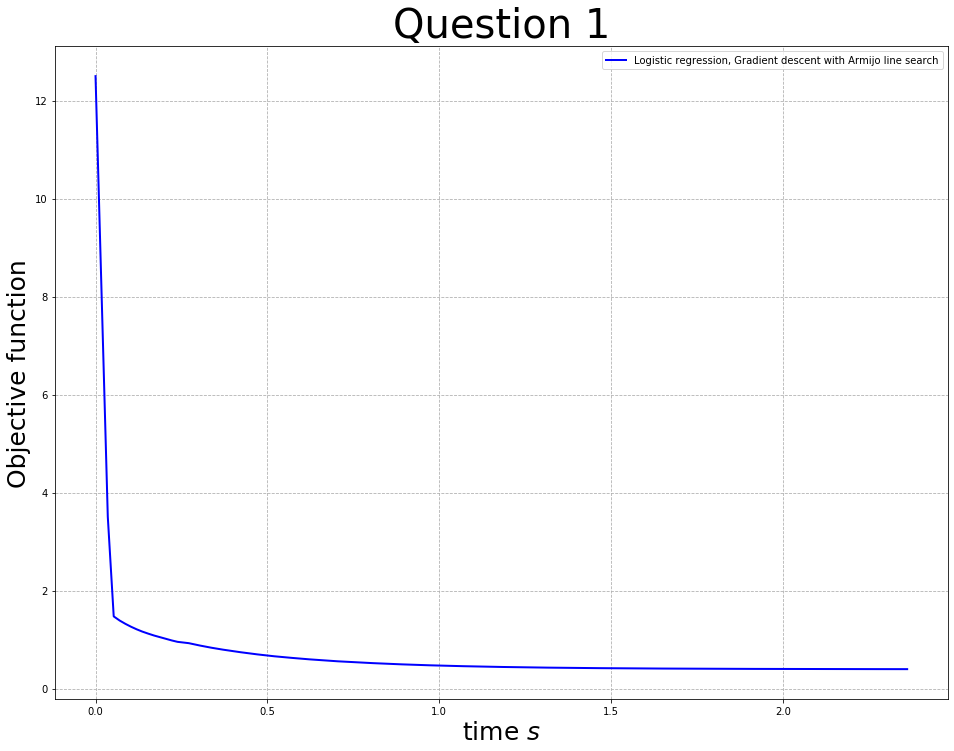

In [14]:
fig = plt.figure(figsize=(16, 12))
plt.plot(t_rgda,loss_rgda, label=("Logistic regression, Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
plt.title('Question 1',fontsize=40)
plt.legend(prop={'size': 10},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [15]:
######################################################################################################
# Q1 get prediction of b and Generalization Error
######################################################################################################
def get_hingeloss_predict(A, x):
    b_pred = A.dot(x)
    b = np.where(b_pred > 0, 1, -1)
    return b

def get_regression_predict(A,x):
    A_dot_x = A.dot(x)
    denoninator = np.exp(-1*A.dot(x))
    b = 1/denoninator
    return np.where(b>0.5,1,-1)

def get_regression_validation_error(b_prediction, b_testing):
    return np.sum(abs(b_prediction - b_testing))/b_testing.shape[0]

In [16]:

b_pred_rgda = get_regression_predict(A_testing,x_rgda)
error=get_regression_validation_error(b_pred_rgda,b_testing)
print('validation error:%.6f\ttype: logistic regression\tmethod: gradient descent with armijo method'%error)

validation error:0.353700	type: logistic regression	method: gradient descent with armijo method


In [17]:
######################################################################################################
# Q2 
######################################################################################################

In [18]:
# armijo line search, return alpha
def armijo_line_search(A,x,b,lambda_,gamma_):
    alpha_ = 1
    f_x = get_regression_loss(A,x,b,lambda_)
    grad = get_regression_gradient(A,x,b,lambda_)
    while True:
        diff = -alpha_ * grad
        x_new = np.array(x + diff)
        f_x_new = get_regression_loss(A,x_new,b,lambda_)
        if (f_x_new - f_x) <= (-alpha_ * gamma_ * norm(grad,2)**2):
            break
        alpha_ = alpha_/2
    return alpha_

# logistic regression + Gradient descent with Armijo line-search
# tag: _rgda 
def regression_gradient_descent_armijo (A, x0, b, epsilon, lambda_, gamma_, max_iterations,record_x = False):
    # initialize variables. 
    x, loss, count, st = x0, get_regression_loss(A,x0,b,lambda_), 1, time.time()
    x_list, loss_list, time_list = [x0], [loss],[st-st]
    grad = get_regression_gradient(A,x,b,lambda_)
    while count <= max_iterations and norm(grad,2)>= epsilon:
        alpha_ = armijo_line_search(A,x,b,lambda_,gamma_)
        x = x - alpha_ * grad
        loss = get_regression_loss(A,x,b,lambda_)
        loss_list.append(loss)
        if record_x:
            x_list.append(x)
        time_list.append(time.time()-st)
        grad = get_regression_gradient(A,x,b,lambda_)
        count +=1
    if not record_x:
        return x, loss_list,time_list
    return x_list,loss_list,time_list

In [19]:
# logistic regression + Acceleratd gradient with Armijo line-search
# tag: _ragda 

def regression_acc_gradient_descent_armijo(A, x0, b, epsilon, lambda_, gamma_, max_iterations,record_x = False):
    # initialize variables. 
    x, loss, count, st = x0, get_regression_loss(A,x0,b,lambda_), 1, time.time()
    x_list, loss_list, time_list = [x0], [loss],[st-st]
    grad = get_regression_gradient(A,x,b,lambda_)
    # initialize parameter
    x_prev = x0
    y = x0
    t = 1
    k = 1
    while count <= max_iterations and norm(grad,2)>= epsilon:
        alpha_ = armijo_line_search(A,x,b,lambda_,gamma_)
        x = y - alpha_ * grad
#         grad_norm = np.linalg.norm(grad_logReg(lambda_, x, A, b), 2)
        t_new = (1 + np.sqrt(1 + 4*(t**2)))/2
        y = x + ((t-1)/t_new) * (x - x_prev)
        t = t_new
        x_prev = x
        k = k + 1
        # update 
        loss = get_regression_loss(A,x,b,lambda_)
        grad = get_regression_gradient(A,x,b,lambda_)
        # append to list
        if record_x:    
            x_list.append(x)
        loss_list.append(loss)
        time_list.append(time.time() - st)
        
    if not record_x:
        return x, loss_list,time_list
    return x_list,loss_list,time_list

In [20]:
# logistic regression + Mini-batch gradient
# tag: _rmbg 
import random,math
# batch_size bk
BATCH_SIZE = 12#Ryzen 3600, 6C 12T
# step size = 1/count , decay too fast
def regression_mini_batch_gradient(A, x0, b, epsilon, lambda_, max_iterations, batch_size, record_x = False):
    # initialize variables. 
    x, loss, count, st = x0, get_regression_loss(A,x0,b,lambda_), 2, time.time()
    x_list, loss_list, time_list = [x0], [loss],[st-st]
    
    while count < max_iterations:
        step_size = 1/math.log(count+1)**2
        batch_index = random.sample(range(0, A.shape[0]), batch_size)
        A_sample, b_sample = A[batch_index], b[batch_index]
        grad = get_regression_gradient(A_sample, x, b_sample, lambda_)
        # update x and loss
        x = x - step_size*grad
        loss = get_regression_loss(A,x,b,lambda_)
        #  append to list
        if record_x:
            x_list.append(x)
        loss_list.append(loss)
        time_list.append(time.time() - st)        
        
        count+=1
    if not record_x:
        return x, loss_list,time_list
    return x_list,loss_list,time_list

In [21]:
# # logistic regression + Stochastic average gradient (SAG)
# # tag: _rsag
def regression_SAG(A, x0, b, epsilon, lambda_, max_iterations):
    x = x0
    sumx = x
    loss = get_regression_loss(A,x0,b,lambda_)
    loss_list = [loss]
    i = 0
    part_grad_array = []
    for j in range(A.shape[0]):
        part_grad_array.append(get_regression_gradient(A[i],x0,b[i],lambda_))
        
    print(len(part_grad_array), type(part_grad_array[0]))
    fx_min = loss
    st = time.time()
    time_list = [0]
    prev_grad = get_regression_gradient(A,x0,b,lambda_)
    while True:
        if i >= max_iterations: 
            print('reach max_iteration')
            break
        a = 1/(i+5)
        # randomly pick one row of A
        index = np.random.randint(0, A.shape[0])
        pgrad_updated = get_regression_gradient(A[i],x,b[i],lambda_)
        new_grad = prev_grad - (part_grad_array[index] - pgrad_updated)/b.shape[0]
        # updating part_grad_array
        part_grad_array[index] = pgrad_updated
        x = x - a * new_grad
        sumx = np.array(x).reshape((len(x),1)) + sumx
        loss = get_regression_loss(A,x,b,lambda_)
        fx_min = min(loss,fx_min)
        if loss>1.05*fx_min:
            break
        loss_list.append(loss)
        prev_grad = new_grad
        i = i + 1
        time_list.append(time.time() - st)
        result = sumx/len(loss_list)
    print(loss_list[-1],time_list[-1])
#     print(new_grad)
    return result, loss_list, time_list

In [22]:
# regression +Stochastic gradient
# tag: _rssg

def regression_stochastic_gradient (A, x0, b, epsilon, lambda_, max_iterations):
    x = x0
#     sumx = x
    loss = get_regression_loss(A, x0, b, lambda_)
    loss_list = [loss]
    count = 0
    st = time.time()
    time_list = [st-st]
    loss_min = loss
    while count < max_iterations:
        step_size = 1/(count + 1)
        # randomly pick one row of A
        index = random.randint(0, A.shape[0]-1)
        partial_grad = get_regression_gradient(A[index],x,b[index],lambda_)
        x = x - step_size * partial_grad
#         sumx = np.array(x).reshape((len(x),1)) + sumx
        loss_min =min(loss,loss_min)
#         if loss>loss_min*1.05:
#             print('stop here')
#             return x, loss_list, time_list
        loss = get_regression_loss(A,x,b,lambda_)
        loss_list.append(loss)
        count = count + 1
        time_list.append(time.time() - st)
#         x = sumx/len(loss_list)
    return x, loss_list, time_list



In [34]:
# ######################################################################################################
# Q2 
# 2.HingeLoss smoothed 
# ######################################################################################################
######################################################################################################
# objective function and gradient of hinge_loss(nonsmoothed)
######################################################################################################
def get_hingeloss_nonsmooth(A ,x,b):
    A_dot_x = A.dot(x)
    loss_temp = A_dot_x*b
    loss = np.average(np.where(loss_temp < 1,1-loss_temp,0))
    return loss

# this is the same as get_hingeloss_nonsmooth
# def get_hingeloss_nonsmooth2(A,x,b):
# #     print('get_hinge_loss')
#     A_dot_x = A.dot(x)
#     ei = A_dot_x*b  # scipy.sparse.coo.coo_matrix ->csr a matrix 
#     one_loss = lambda ei : max(0,1-ei)
#     total_loss = sum(map(one_loss,[ei[i,0] for i in range(ei.shape[0])]))
#     return total_loss/A.shape[0]

def subgradient_hingeloss_nonsmooth(A,x,b,i):
    # return an csr_matrix
    if 1 - (b[i]*(A[i].dot(x)))[0,0] > 0:
        grad = (-b[i]*A[i]).reshape(features+1,1)
        return grad
    else: 
        grad = (np.zeros(shape=(features+1,1), dtype=float))
        return grad

# def subgradient_hingeloss_nonsmooth2(x,ai,bi):
#     result = np.zeros(x.shape)
#     if (1 - ai.dot(x) * bi) > 0:
#         result = np.array(-bi * ai).reshape(x.shape)
#     return result



In [35]:
MU = 0.1
EPSILON = 0.1
GAMMA_ = 0.5
LAMBDA_=0.01
MAX_ITERATION = 100


def get_hingeloss_smooth(A,x,b, mu):
    z = b * A.dot(x)
    phi_x = np.where(z >= 1, 0, (1-z)**2)
    phi_x = np.where(z <= mu, (1-mu)**2 + 2*(1-mu)*(mu - z), phi_x)
    phi_x = np.average(phi_x)
    return phi_x

def get_hingeloss_smooth_gradient(A, x, b, mu):
    z = b * A.dot(x)
    z_mat = np.repeat(z, A.shape[1], axis = 1)
    grad_mid = A.multiply(-2*(1 - z)*b).todense()
    grad_low = A.multiply(-2*(1 - mu)*b).todense()
    grad = np.zeros(A.shape)
    grad = np.where(z >=1, grad, grad_mid)
    grad = np.where(z <= mu, grad_low, grad)
    grad = np.average(grad, axis = 0).reshape(x.shape)
    return grad



def lineSearchArmijo_HL_smooth(A,x, b, mu, gamma):
    alpha = 1
    loss = get_hingeloss_smooth(A, x, b, mu)
    grad = get_hingeloss_smooth_gradient(A, x, b, mu)
    while True:
        h = - alpha * grad
        x_new = np.array(x + h)
        loss_new = get_hingeloss_smooth(A, x_new,b, mu)
        if (loss_new - loss) <= (-alpha * gamma * norm(grad,2)**2):
            break
        alpha = alpha/2
    return alpha

# hingeloss smoothed + Gradient descent with Armijo line-search
# tag _hlsgda
def hl_smooth_gd_Armijo (A, x0, b, epsilon, mu, gamma, max_iterations,record_x = False):
    x,loss = x0,get_hingeloss_smooth(A, x0, b, mu)
    x_list, loss_list =[x], [loss]
    count,st =0, time.time()
    time_list = [st-st]
    while count < max_iterations:
        grad = get_hingeloss_smooth_gradient(A, x, b, mu)
        grad_norm = norm(grad, 2)
        if grad_norm < epsilon: 
            print('stop, norm of gradient < epsilon')
            break
        alpha = lineSearchArmijo_HL_smooth(A,x, b, mu, gamma)
        x_new = x - alpha * grad
        loss_new = get_hingeloss_smooth(A, x_new,b, mu)
        # termination condition
        if abs(loss_new - loss)< epsilon: 
            print('stop because abs(loss_new - loss)< epsilon')
            break
        x = x_new
        loss = loss_new
        if record_x:
            x_list.append(x_new)
        loss_list.append(loss_new)
        time_list.append(time.time() - st)
        count = count + 1
    if not record_x:
        return x, loss_list, time_list
    return x_list, loss_list, time_list


In [36]:
# hingeloss smoothed + Acceleratd gradient with Armijo line-search
# tag _hlsagda

def hl_smooth_acc_grad_Armijo(A, x0, b, epsilon, mu, gamma, max_iterations, record_x = False):
    
    x_prev,loss =x0, get_hingeloss_smooth(A, x0, b, mu)
    x_list, loss_list = [x_prev],[loss]
    count,st =0, time.time()
    time_list = [st-st]
    y = x0
    t = 1

    grad = get_hingeloss_smooth_gradient(A, x0, b, mu)
    while count < max_iterations :
        alpha = lineSearchArmijo_HL_smooth(A, y, b, mu, gamma)
        x = y - alpha * get_hingeloss_smooth_gradient(A, y, b, mu)
        loss_new = get_hingeloss_smooth(A,x,b, mu)
        grad_norm = norm(get_hingeloss_smooth_gradient(A, x, b, mu), 2)
        if grad_norm < epsilon: 
            print('stop, norm of gradient < epsilon')
            break
        if abs(loss_new - loss)<=epsilon: 
            print('stop because abs(loss_new - loss)< epsilon')
            break
        t_new = (1 + np.sqrt(1 + 4*(t**2)))/2
        y = x + ((t-1)/t_new) * (x - x_prev)
        t = t_new
        x_prev = x
        loss = loss_new
        count = count + 1

        if record_x:
            x_list.append(x)
        loss_list.append(loss)
        time_list.append(time.time() - st)
    if not record_x:
        return x, loss_list, time_list
    return x_list, loss_list, time_list

In [37]:
# hingeloss smoothed + Mini-batch gradient
# tag _hlsmbg

import random,math
# batch_size bk
BATCH_SIZE = 12#Ryzen 3600, 6C 12T
# step size = 1/count , decay too fast
def hl_smooth_mini_batch_gradient(A, x0, b, epsilon, mu, max_iterations, batch_size, record_x = False):
    # initialize variables. 
    x,loss =x0, get_hingeloss_smooth(A, x0, b, mu)
    x_list, loss_list = [x],[loss]
    count,st =1, time.time()
    time_list = [st-st]
    
    while count < max_iterations:
        step_size = 1/math.log(count+1)**2
        batch_index = random.sample(range(0, A.shape[0]), batch_size)
        A_sample, b_sample = A[batch_index], b[batch_index]
        
        grad = get_hingeloss_smooth_gradient(A_sample, x, b_sample, mu)
        # update x and loss
        x = x - step_size*grad
        loss = get_hingeloss_smooth(A,x,b, mu)
        #  append to list
        if record_x:
            x_list.append(x)
        loss_list.append(loss)
        time_list.append(time.time() - st)        
        
        count+=1
    if not record_x:
        return x, loss_list,time_list
    return x_list,loss_list,time_list
        

In [38]:
# hingeloss smoothed +Stochastic gradient
# tag: _hlssg

def hingeloss_smooth_stochastic_gradient (A, x0, b, epsilon, mu, max_iterations):
    x = x0
#     sumx = x
    loss = get_hingeloss_smooth(A, x0, b, mu)
    loss_list = [loss]
    count = 0
    st = time.time()
    time_list = [st-st]
    loss_min = loss
    while count < max_iterations:
        step_size = 1/(count + 1)
        # randomly pick one row of A
        index = np.random.randint(0, A.shape[0]-1)
        partial_grad = get_hingeloss_smooth_gradient(A[index], x, b[index], mu)
        x = x - step_size * partial_grad
#         sumx = np.array(x).reshape((len(x),1)) + sumx
        loss_min =min(loss,loss_min)
#         if loss>loss_min*1.05:
#             print('stop here')
#             return x, loss_list, time_list
        loss = get_hingeloss_smooth(A, x,b, mu)
        loss_list.append(loss)
        count = count + 1
        time_list.append(time.time() - st)
#         x = sumx/len(loss_list)
    return x, loss_list, time_list

In [39]:
def hingeloss_smooth_SAG(A, x0, b, epsilon, lambda_, max_iterations):
    x = x0
    sumx = x
    loss = get_hingeloss_smooth(A,x0,b,lambda_)
    loss_list = [loss]
    count = 0
    part_grad_array = []
    for j in range(A.shape[0]):
        part_grad_array.append(get_hingeloss_smooth_gradient(A[j],x0,b[j],lambda_))
        
    print(len(part_grad_array), type(part_grad_array[0]))
    loss_min = loss
    st = time.time()
    time_list = [0]
    prev_grad = get_hingeloss_smooth_gradient(A,x0,b,lambda_)
    while True:
        if count >= max_iterations: 
            print('reach max_iteration')
            break
        a = 1/(count+3)
        # randomly pick one row of A
        index = np.random.randint(0, A.shape[0])
        pgrad_updated = get_hingeloss_smooth_gradient(A[index],x,b[index],lambda_)
        new_grad = prev_grad - (part_grad_array[index] - pgrad_updated)/b.shape[0]
        # updating part_grad_array
        part_grad_array[index] = pgrad_updated
        x = x - a * new_grad
        sumx = np.array(x).reshape((len(x),1)) + sumx
        loss = get_hingeloss_smooth(A,x,b,lambda_)
        # update lossloss_min and add a termination condition
        loss_min = min(loss,loss_min)
        if loss>1.05*loss_min:
            break
        loss_list.append(loss)
        prev_grad = new_grad
        count += 1
        time_list.append(time.time() - st)
        result = sumx/len(loss_list)
    print(loss_list[-1],time_list[-1])
#     print(new_grad)
    return result, loss_list, time_list

In [48]:
######################################################################################################
# Q2 
# 2. Nonsmoothed HingeLoss
######################################################################################################

MU = 0.1
EPSILON = 0.1
GAMMA_ = 0.5
LAMBDA_=0.01
MAX_ITERATION = 100

##############################################################################
#Q2 Nonsmoothed Hinge Loss
##############################################################################
def get_hingeloss_nonsmooth(A ,x,b):
#     print(A.shape,x.shape,b.shape)
    A_dot_x = A.dot(x)
    loss_temp = A_dot_x*b
    loss = np.average(np.where(loss_temp < 1,1-loss_temp,0))
    return loss

print(get_hingeloss_nonsmooth(A_training ,x0,b_training))


# returns a n*1 nparray()
def get_hingeloss_nonsmooth_gradient_i(A,x,b,i):
    if 1 - (b[i]*(A[i].dot(x)))[0,0] > 0:
        grad = (-b[i]*A[i]).reshape(x.shape[0],1)
        return grad
    else: 
        grad = (np.zeros(shape=(x.shape[0],1), dtype=float))
        return grad
    
def get_hingeloss_nonsmooth_gradient(A,x,b):
    b_copy = np.copy(b)
    val = np.multiply(b_copy,A*x)
    b_copy[val > 1] = 0
    grad = A.multiply(-b_copy)
    grad = A.mean(0).transpose()
    return grad
    
#     if 1 - (b[i]*(A[i].dot(x)))[0,0] > 0:
#         grad = (-b[i]*A[i]).reshape(x.shape[0],1)
#         return grad
#     else: 
#         grad = (np.zeros(shape=(x.shape[0],1), dtype=float))
#         return grad 

# calculate multiple data's sub gradient of hinge loss
def hingeloss_nonsmooth_subgradient(A,x,b):
    indicator = 1 - A.dot(x) * b
    non_zero_indices = np.where(indicator > 0)[0]
    if (len(non_zero_indices) == 0):
        return np.zeros(x.shape)
    sub_grad = A[non_zero_indices].multiply(-b[non_zero_indices]).toarray()
    sub_grad = np.array(np.average(sub_grad, axis = 0)).reshape(x.shape)
    return sub_grad

# print(get_hingeloss_nonsmooth_gradient(A_training ,x0,b_training))
# print(hingeloss_nonsmooth_subgradient(A_training ,x0,b_training))

12.016243516243517


In [49]:
# hingeloss_nonsmooth_stochastic_sub_gradient
# tag _hlnssg
def hingeloss_nonsmooth_stochastic_sub_gradient(A, x0, b, epsilon, max_iterations):
    x = x0
    loss = get_hingeloss_nonsmooth(A, x, b)
    loss_list = [loss]
    loss_min = loss
    loss_index = 0
    count = 0
    
    st = time.time()
    time_list = [st-st]
    grad = get_hingeloss_nonsmooth_gradient(A,x,b)
    while count < max_iterations:
        step_size = 0.5/(count+1)
#         step_size = 1/(count+1)
        # sample_i
        index = random.randint(0, A.shape[0])
        g = get_hingeloss_nonsmooth_gradient_i(A,x,b,index )
        x = x - step_size * g

        
#         if loss >2*loss_min:
#             return x, loss_list, time_list
        loss_list.append(loss)
        loss = get_hingeloss_nonsmooth(A, x, b)
        count = count + 1
        time_list.append(time.time() - st)
    print('loss_min ',loss_min)
    return x, loss_list, time_list

In [55]:
# hinge loss nonsmooth mini-batch
# tag: _hlnmbg
MAX_ITERATION = 1000
BATCH_SIZE = 12
# Ryzen 3600, 6C 12T
# step size = 1/count , decay too fast
def hl_nonsmooth_mini_batch_gradient(A, x0, b, epsilon, max_iterations, batch_size, record_x = False):
    # initialize variables. 
    x,loss =x0, get_hingeloss_nonsmooth(A,x0,b)
    x_list, loss_list = [x],[loss]
    count,st =1, time.time()
    time_list = [st-st]
    
    while count < max_iterations:
        step_size = 1/math.log(count+1)**2
        batch_index = random.sample(range(0, A.shape[0]), batch_size)
        A_sample, b_sample = A[batch_index], b[batch_index]
        
        grad = hingeloss_nonsmooth_subgradient(A_sample,x,b_sample)
        # update x and loss
        x = x - step_size*grad
        loss = get_hingeloss_nonsmooth(A,x,b)
        #  append to list
        if record_x:
            x_list.append(x)
        loss_list.append(loss)
        time_list.append(time.time() - st)        
        
        count+=1
    print(count)
    if not record_x:
        return x, loss_list,time_list
    return x_list,loss_list,time_list

In [59]:
# hinge loss nonsmooth SAG
# tag: _hlnsag
def hingeloss_nonsmooth_SAG(A, x0, b, epsilon, max_iterations):
    time_list, loss_list = [],[]
    x, x_total = x0,x0
    count =1
    sub_grad_list = []
    for i in range(A.shape[0]):
        sub_grad_list.append(hingeloss_nonsmooth_subgradient(A[i],x,b[i]))
    grad = (hingeloss_nonsmooth_subgradient(A,x,b))
    st = time.time()
    loss_min = float('inf')
    while count < max_iterations:
        step_size = 1/(count+1)
        index = random.randint(0,A.shape[0])
        grad_change = hingeloss_nonsmooth_subgradient(A[index],x,b[index])
        grad = grad - (sub_grad_list[index] - grad_change)
        x = x - step_size*grad
        x_total = x_total + np.array(x).reshape(x_total.shape[0],x_total.shape[1])
        loss = get_hingeloss_nonsmooth(A,x,b)
        loss_min = min(loss,loss_min)
        if loss > loss_min*1.1:
            break
        loss_list.append(loss)
        time_list.append(time.time()-st)
        count +=1
    return x, loss_list, time_list

In [28]:
x_ragda,loss_ragda,time_ragda=regression_acc_gradient_descent_armijo(A_training,x0,b_training,EPSILON,LAMBDA_,GAMMA_,MAX_ITERATION,False)
print('done...... regression_acc_gradient_descent_armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_ragda), time_ragda[-1],loss_ragda[-1]))

done...... regression_acc_gradient_descent_armijo
iteration 85	 time 1.480 	loss 0.396


In [29]:
x_rgda,loss_rgda,time_rgda=regression_gradient_descent_armijo(A_training,x0,b_training,EPSILON,LAMBDA_,GAMMA_,MAX_ITERATION,False)
print('done...... regression_gradient_descent_armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_rgda), time_rgda[-1],loss_rgda[-1]))

done...... regression_gradient_descent_armijo
iteration 142	 time 2.355 	loss 0.398


In [30]:
x_rmbg,loss_rmbg,time_rmbg=regression_mini_batch_gradient(A_training,x0,b_training,EPSILON,LAMBDA_,MAX_ITERATION,BATCH_SIZE,False)
print('done...... regression_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_rmbg), time_rmbg[-1],loss_rmbg[-1]))    

done...... regression_mini_batch_gradient
iteration 999	 time 1.478 	loss 0.620


In [31]:
x_rsag,loss_rsag,time_rsag = regression_SAG(A_training,x0,b_training,EPSILON,LAMBDA_,MAX_ITERATION)
print('done...... regression_SAG')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_rsag), time_rsag[-1],loss_rsag[-1]))

29304 <class 'numpy.ndarray'>
1.5455160088815438 0.1376662254333496
done...... regression_SAG
iteration 91	 time 0.138 	loss 1.546


In [32]:
x_rssg, loss_rssg, time_rssg = regression_stochastic_gradient(A_training, x0,b_training, EPSILON, LAMBDA_, MAX_ITERATION)
print('done...... regression_stochastic_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_rssg), time_rssg[-1],loss_rssg[-1]))

done...... regression_stochastic_gradient
iteration 1001	 time 1.446 	loss 1.326


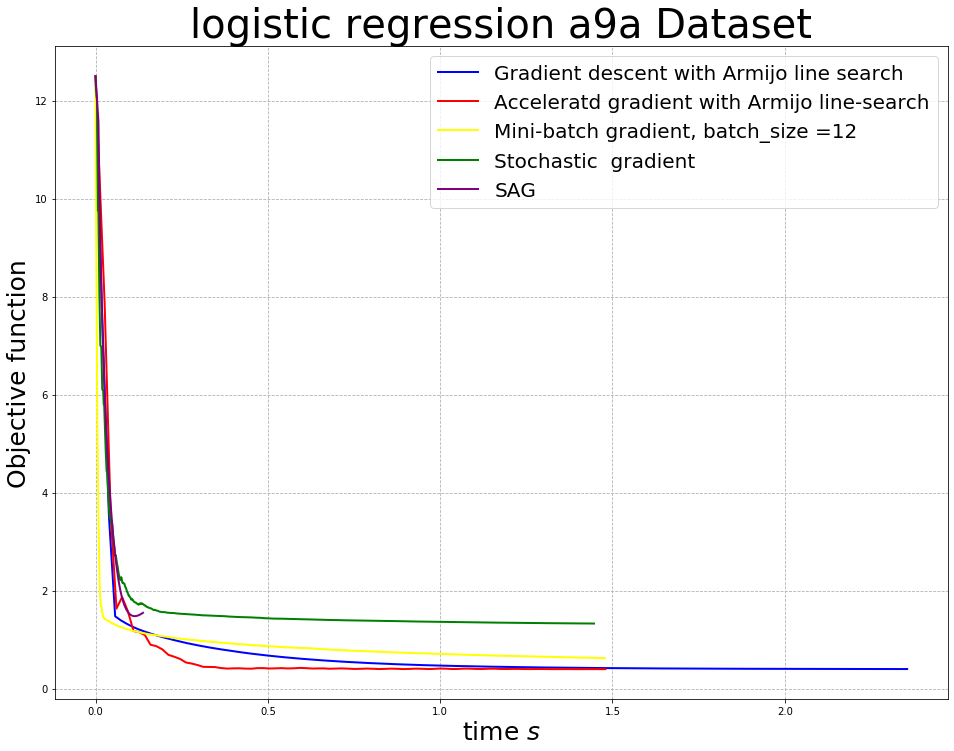

In [46]:
fig = plt.figure(figsize=(16, 12))
plt.plot(time_rgda,loss_rgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
plt.plot(time_ragda,loss_ragda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_rmbg,loss_rmbg, label=("Mini-batch gradient, batch_size =12"), linewidth=2.0, color ="yellow")
plt.plot(time_rssg,loss_rssg, label=("Stochastic  gradient "), linewidth=2.0, color ="green")
plt.plot(time_rsag,loss_rsag, label=("SAG"), linewidth=2.0, color ="purple")

plt.title('logistic regression a9a Dataset',fontsize=40)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [ ]:
##############################################################################
# Smoothed Hinge Loss 
##############################################################################

In [40]:
x_hlsgda, loss_hlsgda, time_hlsgda = hl_smooth_gd_Armijo(A_training, x0, b_training, EPSILON, MU, GAMMA_, MAX_ITERATION)
print('done...... hl_smooth_gd_Armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlsgda), time_hlsgda[-1],loss_hlsgda[-1]))

stop because abs(loss_new - loss)< epsilon
done...... hl_smooth_gd_Armijo
iteration 5	 time 0.544 	loss 0.944


In [41]:
x_hlsagda ,loss_hlsagda ,time_hlsagda =hl_smooth_acc_grad_Armijo(A_training, x0, b_training, EPSILON, MU, GAMMA_, MAX_ITERATION)
print('done...... hl_smooth_acc_grad_Armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlsagda), time_hlsagda[-1],loss_hlsagda[-1]))

stop because abs(loss_new - loss)< epsilon
done...... hl_smooth_acc_grad_Armijo
iteration 5	 time 0.881 	loss 0.839


In [43]:
x_hlsmbg,loss_hlsmbg,time_hlsmbg = hl_smooth_mini_batch_gradient(A_training,x0,b_training,EPSILON,MU,MAX_ITERATION,BATCH_SIZE,False)
print('done...... hl_smooth_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlsmbg), time_hlsmbg[-1],loss_hlsmbg[-1]))     

done...... hl_smooth_mini_batch_gradient
iteration 100	 time 0.089 	loss 0.766


In [44]:
x_hlssg, loss_hlssg, time_hlssg = hingeloss_smooth_stochastic_gradient(A_training, x0,b_training, EPSILON, MU, MAX_ITERATION)
print('done...... hingeloss_smooth_stochastic_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlssg), time_hlssg[-1],loss_hlssg[-1]))

done...... hingeloss_smooth_stochastic_gradient
iteration 101	 time 0.084 	loss 1.468


In [45]:
x_hlsSAG, loss_hlsSAG, time_hlsSAG = hingeloss_smooth_SAG(A_training,x0,b_training,EPSILON,MU,MAX_ITERATION)
print('done...... hingeloss_smooth_SAG')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlsSAG), time_hlsSAG[-1],loss_hlsSAG[-1]))

29304 <class 'numpy.ndarray'>
1.1372497452822865 0.0738670825958252
done...... hingeloss_smooth_SAG
iteration 12	 time 0.074 	loss 1.137


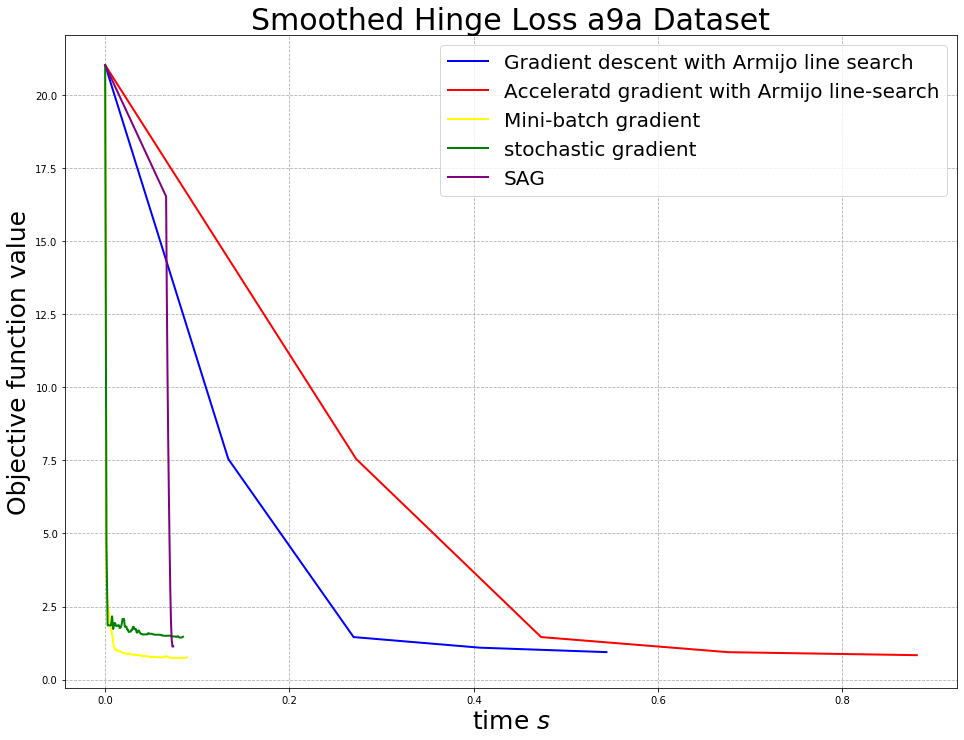

In [47]:
##############################################################################
# Plot Smoothed Hinge Loss 
##############################################################################
fig = plt.figure(figsize=(16, 12))
plt.plot(time_hlsgda, loss_hlsgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
plt.plot(time_hlsagda, loss_hlsagda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_hlsmbg, loss_hlsmbg, label=("Mini-batch gradient"), linewidth=2.0, color ="yellow")
plt.plot(time_hlssg, loss_hlssg,label=("stochastic gradient"), linewidth=2.0, color ="green")
plt.plot(time_hlsSAG, loss_hlsSAG, label=("SAG"), linewidth=2.0, color ="purple")

plt.title('Smoothed Hinge Loss a9a Dataset',fontsize=30)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function value", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [51]:
##############################################################################
# nonsmoothed Hinge Loss 
##############################################################################

In [56]:
x_hlnmbg,loss_hlnmbg,time_hlnmbg = hl_nonsmooth_mini_batch_gradient(A_training,x0,b_training,EPSILON,MAX_ITERATION,BATCH_SIZE,False)
print('done...... hl_nonsmooth_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlnmbg), time_hlnmbg[-1],loss_hlnmbg[-1]))

1000
done...... hl_nonsmooth_mini_batch_gradient
iteration 1000	 time 0.690 	loss 0.375


In [57]:
x_hlnssg, loss_hlnssg, time_hlnssg = hingeloss_nonsmooth_stochastic_sub_gradient(A_training,x0,b_training,EPSILON,MAX_ITERATION)
print('done...... hingeloss_nonsmooth_stochastic_sub_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlnssg), time_hlnssg[-1],loss_hlnssg[-1]))

loss_min  12.016243516243517
done...... hingeloss_nonsmooth_stochastic_sub_gradient
iteration 1001	 time 0.546 	loss 0.734


In [60]:
x_hlnsag, loss_hlnsag, time_hlnsag = hingeloss_nonsmooth_SAG(A_training,x0,b_training,EPSILON,MAX_ITERATION)
print('done...... hingeloss_nonsmooth_SAG')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_hlnsag), time_hlnsag[-1],loss_hlnsag[-1]))

done...... hingeloss_nonsmooth_SAG
iteration 12	 time 0.007 	loss 1.259


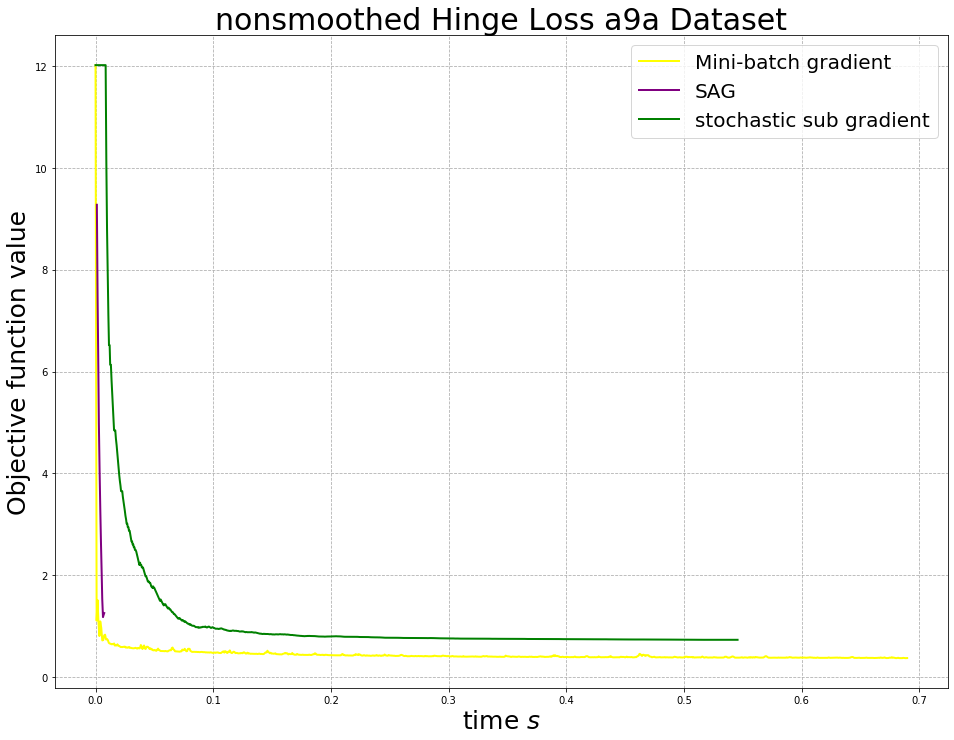

In [61]:
fig = plt.figure(figsize=(16, 12))
# plt.plot(time_hlsgda, loss_hlsgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
# plt.plot(time_hlsagda, loss_hlsagda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_hlnmbg, loss_hlnmbg, label=("Mini-batch gradient"), linewidth=2.0, color ="yellow")
plt.plot(time_hlnsag, loss_hlnsag, label=("SAG"), linewidth=2.0, color ="purple")
plt.plot(time_hlnssg, loss_hlnssg, label=("stochastic sub gradient"), linewidth=2.0, color ="green")


plt.title('nonsmoothed Hinge Loss a9a Dataset',fontsize=30)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function value", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [62]:
##############################################################################
# print error for logistic regression 
##############################################################################
def get_hingeloss_predict(A, x):
    b_pred = A.dot(x)
    b = np.where(b_pred > 0, 1, -1)
    return b

def get_regression_predict(A,x):
    A_dot_x = A.dot(x)
    denoninator = np.exp(-1*A.dot(x))
    b = 1/denoninator
    return np.where(b>0.5,1,-1)

def get_regression_validation_error(b_prediction, b_testing):
    return np.sum(abs(b_prediction - b_testing))/b_testing.shape[0]
regression_result =[]
regression_result.append(("Gradient descent with Armijo line search", x_rgda))
regression_result.append(("Acceleratd gradient with Armijo line-search", x_ragda))
regression_result.append(("Mini-batch gradient, batch_size =12", x_rmbg))
regression_result.append(("Stochastic gradient ", x_rssg))
regression_result.append(("SAG", x_rsag))

print('{:50}  {:10s}'.format('method','error'))
for i in regression_result:
    tag = i[0]
    x = i[1]
    predict = get_regression_predict(A_testing,x)
    error = get_regression_validation_error(predict,b_testing)
    print('{:50}  {:.4f}'.format(tag,error))


method                                              error     
Gradient descent with Armijo line search            0.3537
Acceleratd gradient with Armijo line-search         0.3525
Mini-batch gradient, batch_size =12                 0.3850
Stochastic gradient                                 0.7037
SAG                                                 1.5376


In [ ]:
##############################################################################
# Covtype dataset
##############################################################################
features = 54
features_cov = 54

In [63]:
##############################################################################
# logistic regression
##############################################################################

MAX_ITERATION = 1000
LAMBDA_ = 0.01
GAMMA_=0.5
EPSILON=0.01


x_cov_rgda,loss_cov_rgda,time_cov_rgda=regression_gradient_descent_armijo(A_cov_training,x0_cov,b_cov_training,EPSILON,LAMBDA_,GAMMA_,MAX_ITERATION,False)
print('done...... regression_gradient_descent_armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_rgda), time_cov_rgda[-1],loss_cov_rgda[-1]))


done...... regression_gradient_descent_armijo
iteration 50	 time 0.701 	loss 0.647


In [64]:
x_cov_ragda,loss_cov_ragda,time_cov_ragda=regression_acc_gradient_descent_armijo(A_cov_training,x0_cov,b_cov_training,EPSILON,LAMBDA_,GAMMA_,MAX_ITERATION,False)
print('done...... regression_acc_gradient_descent_armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_ragda), time_cov_ragda[-1],loss_cov_ragda[-1]))


done...... regression_acc_gradient_descent_armijo
iteration 16	 time 0.235 	loss 0.647


In [65]:
x_cov_rmbg,loss_cov_rmbg,time_cov_rmbg=regression_mini_batch_gradient(A_cov_training,x0_cov,b_cov_training,EPSILON,LAMBDA_,MAX_ITERATION,BATCH_SIZE,False)
print('done...... regression_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_rmbg), time_cov_rmbg[-1],loss_cov_rmbg[-1]))


done...... regression_mini_batch_gradient
iteration 999	 time 1.420 	loss 0.651


In [66]:
x_cov_rsag,loss_cov_rsag,time_cov_rsag = regression_SAG(A_cov_training,x0_cov,b_cov_training,EPSILON,LAMBDA_,MAX_ITERATION)
print('done...... regression_SAG')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_rsag), time_cov_rsag[-1],loss_cov_rsag[-1]))

29304 <class 'numpy.ndarray'>
reach max_iteration
0.6896541517494102 1.4238808155059814
done...... regression_SAG
iteration 1001	 time 1.424 	loss 0.690


In [67]:
x_cov_rssg, loss_cov_rssg, time_cov_rssg = regression_stochastic_gradient(A_cov_training,x0_cov,b_cov_training, EPSILON, LAMBDA_, MAX_ITERATION)
print('done...... regression_stochastic_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_rssg), time_cov_rssg[-1],loss_cov_rssg[-1]))

done...... regression_stochastic_gradient
iteration 1001	 time 1.423 	loss 0.674


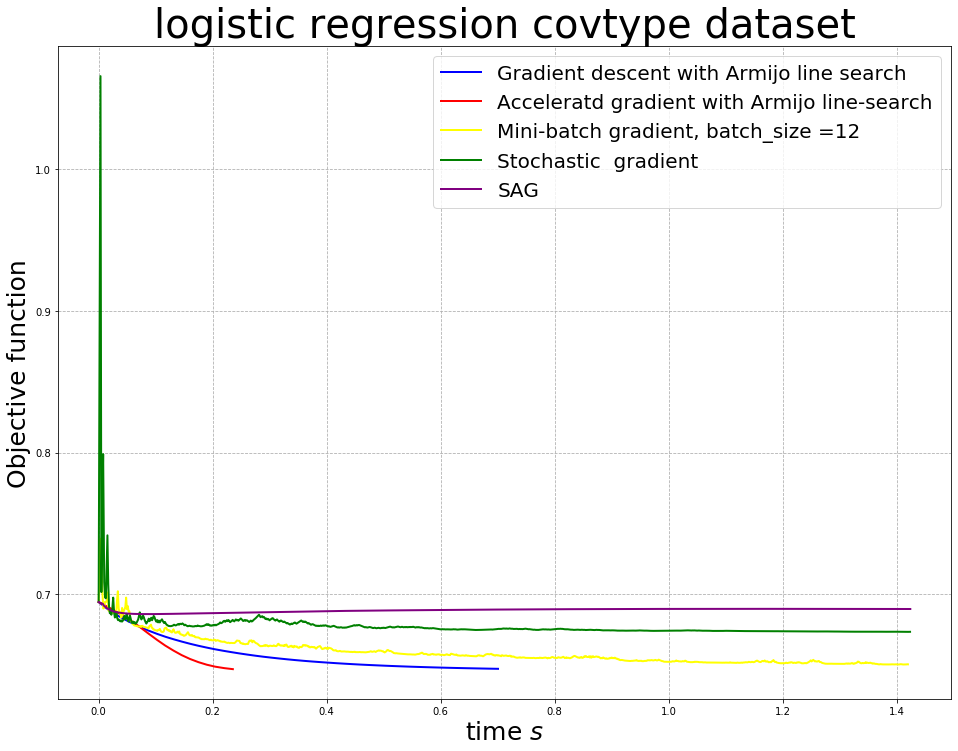

In [68]:
fig = plt.figure(figsize=(16, 12))
plt.plot(time_cov_rgda,loss_cov_rgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
plt.plot(time_cov_ragda,loss_cov_ragda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_cov_rmbg,loss_cov_rmbg, label=("Mini-batch gradient, batch_size =12"), linewidth=2.0, color ="yellow")
plt.plot(time_cov_rssg,loss_cov_rssg, label=("Stochastic  gradient "), linewidth=2.0, color ="green")
plt.plot(time_cov_rsag,loss_cov_rsag, label=("SAG"), linewidth=2.0, color ="purple")

plt.title('logistic regression covtype dataset',fontsize=40)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()


In [69]:
##############################################################################
# smoothed hingeloss
##############################################################################

In [70]:
x_cov_hlsgda, loss_cov_hlsgda, time_cov_hlsgda = hl_smooth_gd_Armijo(A_cov_training, x0_cov, b_cov_training, EPSILON, MU, GAMMA_, MAX_ITERATION)
print('done...... hl_smooth_gd_Armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlsgda), time_cov_hlsgda[-1],loss_cov_hlsgda[-1]))

stop because abs(loss_new - loss)< epsilon
done...... hl_smooth_gd_Armijo
iteration 7	 time 0.362 	loss 0.844


In [71]:
x_cov_hlsagda ,loss_cov_hlsagda ,time_cov_hlsagda =hl_smooth_acc_grad_Armijo(A_cov_training, x0_cov, b_cov_training, EPSILON, MU, GAMMA_, MAX_ITERATION)
print('done...... hl_smooth_acc_grad_Armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlsagda), time_cov_hlsagda[-1],loss_cov_hlsagda[-1]))

stop because abs(loss_new - loss)< epsilon
done...... hl_smooth_acc_grad_Armijo
iteration 12	 time 1.010 	loss 0.757


In [72]:
x_cov_hlsmbg,loss_cov_hlsmbg,time_cov_hlsmbg = hl_smooth_mini_batch_gradient(A_cov_training,x0_cov,b_cov_training,EPSILON,MU,MAX_ITERATION,BATCH_SIZE,False)
print('done...... hl_smooth_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlsmbg), time_cov_hlsmbg[-1],loss_cov_hlsmbg[-1]))

done...... hl_smooth_mini_batch_gradient
iteration 1000	 time 0.780 	loss 0.717


In [73]:
x_cov_hlssg, loss_cov_hlssg, time_cov_hlssg = hingeloss_smooth_stochastic_gradient(A_cov_training, x0_cov,b_cov_training, EPSILON, MU, MAX_ITERATION)
print('done...... hingeloss_smooth_stochastic_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlssg), time_cov_hlssg[-1],loss_cov_hlssg[-1]))

done...... hingeloss_smooth_stochastic_gradient
iteration 1001	 time 0.744 	loss 0.962


In [74]:
x_cov_hlsSAG, loss_cov_hlsSAG, time_cov_hlsSAG = hingeloss_smooth_SAG(A_cov_training,x0_cov,b_cov_training,EPSILON,MU,MAX_ITERATION)
print('done...... hingeloss_smooth_SAG')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlsSAG), time_cov_hlsSAG[-1],loss_cov_hlsSAG[-1]))

29304 <class 'numpy.ndarray'>
reach max_iteration
0.8768727480343415 0.7419073581695557
done...... hingeloss_smooth_SAG
iteration 1001	 time 0.742 	loss 0.877


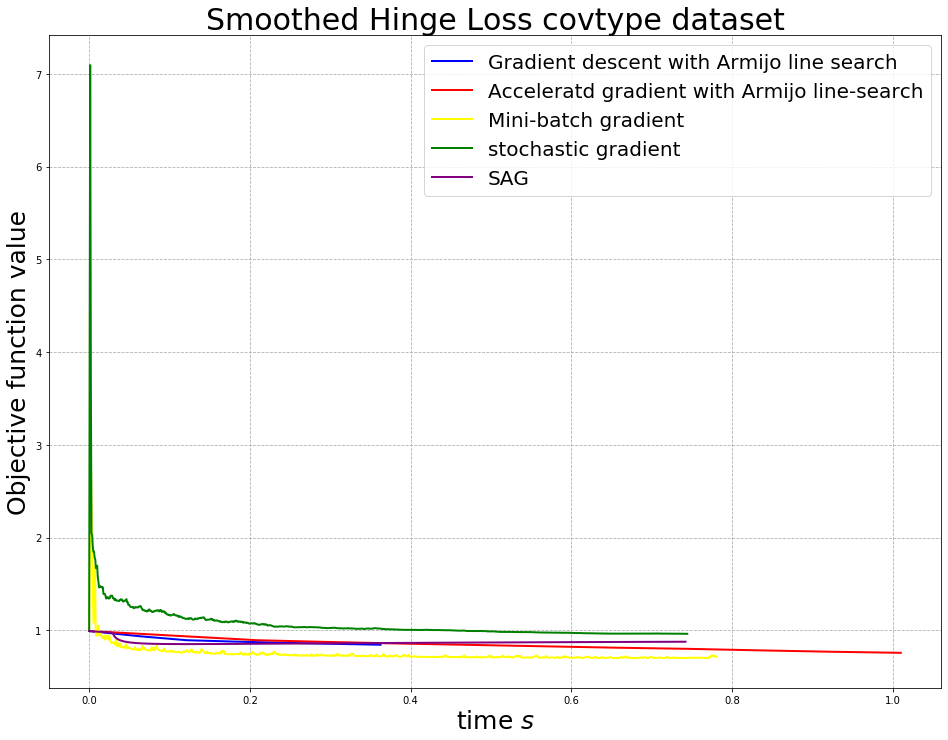

In [75]:
##############################################################################
# Plot Smoothed Hinge Loss
##############################################################################
fig = plt.figure(figsize=(16, 12))
plt.plot(time_cov_hlsgda, loss_cov_hlsgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
plt.plot(time_cov_hlsagda, loss_cov_hlsagda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_cov_hlsmbg, loss_cov_hlsmbg, label=("Mini-batch gradient"), linewidth=2.0, color ="yellow")
plt.plot(time_cov_hlssg, loss_cov_hlssg,label=("stochastic gradient"), linewidth=2.0, color ="green")
plt.plot(time_cov_hlsSAG, loss_cov_hlsSAG, label=("SAG"), linewidth=2.0, color ="purple")



plt.title('Smoothed Hinge Loss covtype dataset',fontsize=30)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function value", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [76]:
##############################################################################
#Q2 Nonsmoothed Hinge Loss
##############################################################################


In [77]:
x_cov_hlnssg, loss_cov_hlnssg, time_cov_hlnssg = hingeloss_nonsmooth_stochastic_sub_gradient(A_cov_training,x0_cov,b_cov_training,EPSILON,MAX_ITERATION)
print('done...... hingeloss_nonsmooth_stochastic_sub_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlnssg), time_cov_hlnssg[-1],loss_cov_hlnssg[-1]))

loss_min  1.0012732825972326
done...... hingeloss_nonsmooth_stochastic_sub_gradient
iteration 1001	 time 0.473 	loss 0.992


In [78]:
x_cov_hlnsag, loss_cov_hlnsag, time_cov_hlnsag = hingeloss_nonsmooth_SAG(A_cov_training,x0_cov,b_cov_training,EPSILON,MAX_ITERATION)
print('done...... hingeloss_nonsmooth_SAG')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlnsag), time_cov_hlnsag[-1],loss_cov_hlnsag[-1]))

done...... hingeloss_nonsmooth_SAG
iteration 999	 time 0.514 	loss 0.886


In [79]:
x_cov_hlnmbg,loss_cov_hlnmbg,time_cov_hlnmbg = hl_nonsmooth_mini_batch_gradient(A_cov_training,x0_cov,b_cov_training,EPSILON,MAX_ITERATION,BATCH_SIZE,False)
print('done...... hl_nonsmooth_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_cov_hlnmbg), time_cov_hlnmbg[-1],loss_cov_hlnmbg[-1]))

1000
done...... hl_nonsmooth_mini_batch_gradient
iteration 1000	 time 0.618 	loss 0.698


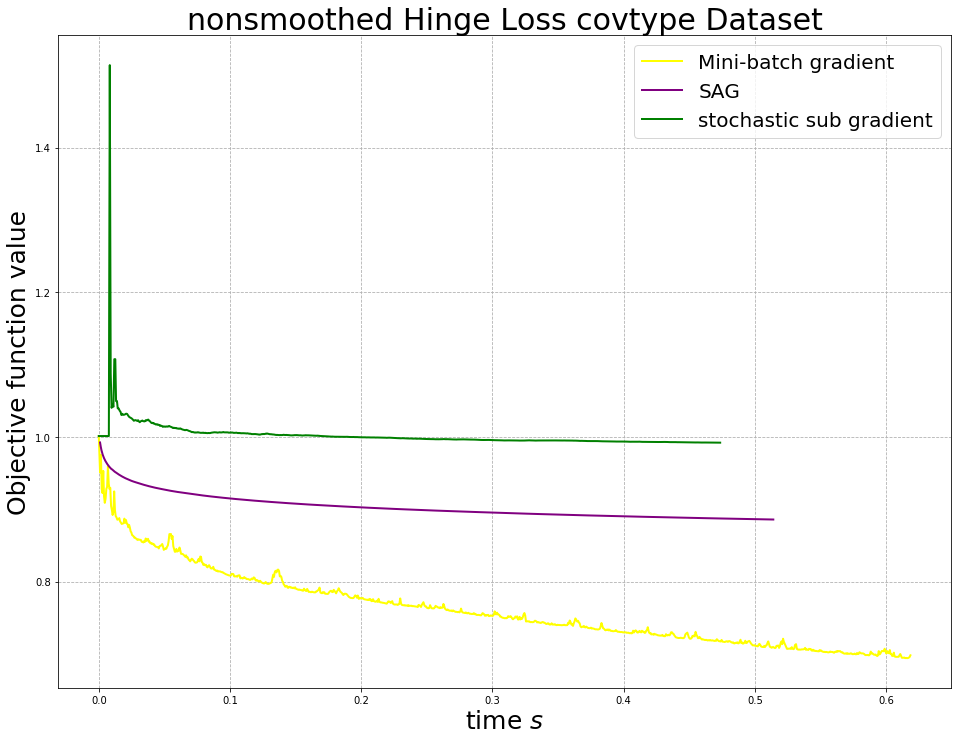

In [81]:
fig = plt.figure(figsize=(16, 12))
# plt.plot(time_hlsgda, loss_hlsgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
# plt.plot(time_hlsagda, loss_hlsagda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_cov_hlnmbg, loss_cov_hlnmbg, label=("Mini-batch gradient"), linewidth=2.0, color ="yellow")
plt.plot(time_cov_hlnsag, loss_cov_hlnsag, label=("SAG"), linewidth=2.0, color ="purple")
plt.plot(time_cov_hlnssg, loss_cov_hlnssg, label=("stochastic sub gradient"), linewidth=2.0, color ="green")


plt.title('nonsmoothed Hinge Loss covtype Dataset',fontsize=30)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function value", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()




In [82]:
##############################################################################
# news20 dataset
##############################################################################
features = 1355191
features_news = 1355191


In [83]:
##############################################################################
# logistic regression
##############################################################################
MAX_ITERATION = 1000
LAMBDA_ = 0.01
GAMMA_=0.5
EPSILON=0.01

In [84]:
x_news_rgda,loss_news_rgda,time_news_rgda=regression_gradient_descent_armijo(A_news_training,x0_news,b_news_training,EPSILON,LAMBDA_,GAMMA_,MAX_ITERATION,False)
print('done...... regression_gradient_descent_armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_rgda), time_news_rgda[-1],loss_news_rgda[-1]))


done...... regression_gradient_descent_armijo
iteration 157	 time 84.203 	loss 0.136


In [85]:
x_news_ragda,loss_news_ragda,time_news_ragda=regression_acc_gradient_descent_armijo(A_news_training,x0_news,b_news_training,EPSILON,LAMBDA_,GAMMA_,MAX_ITERATION,False)
print('done...... regression_acc_gradient_descent_armijo')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_ragda), time_news_ragda[-1],loss_news_ragda[-1]))


done...... regression_acc_gradient_descent_armijo
iteration 25	 time 12.987 	loss 0.134


In [86]:
x_news_rmbg,loss_news_rmbg,time_news_rmbg=regression_mini_batch_gradient(A_news_training,x0_news,b_news_training,EPSILON,LAMBDA_,MAX_ITERATION,BATCH_SIZE,False)
print('done...... regression_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_rmbg), time_news_rmbg[-1],loss_news_rmbg[-1]))


done...... regression_mini_batch_gradient
iteration 999	 time 45.258 	loss 0.483


In [87]:
# x_news_rsag,loss_news_rsag,time_news_rsag = regression_SAG(A_news_training,x0_news,b_news_training,EPSILON,LAMBDA_,MAX_ITERATION)
# print('done...... regression_SAG')
# print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_rsag), time_news_rsag[-1],loss_news_rsag[-1]))


In [88]:
x_news_rssg, loss_news_rssg, time_news_rssg = regression_stochastic_gradient(A_news_training,x0_news,b_news_training, EPSILON, LAMBDA_, MAX_ITERATION)
print('done...... regression_stochastic_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_rssg), time_news_rssg[-1],loss_news_rssg[-1]))


done...... regression_stochastic_gradient
iteration 1001	 time 45.617 	loss 1.185


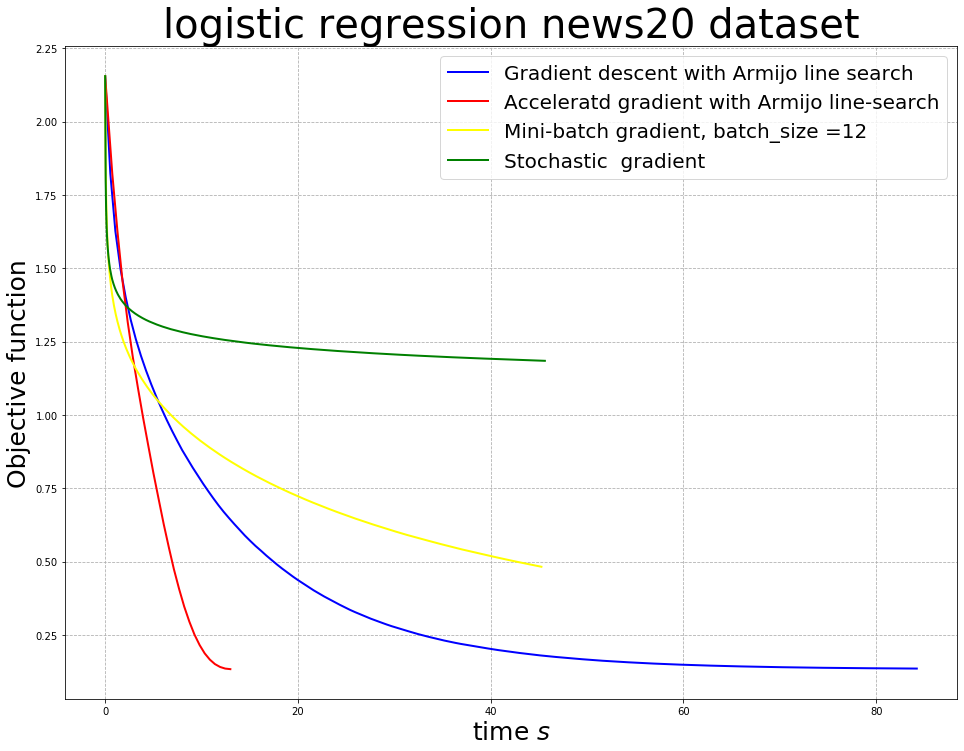

In [89]:
fig = plt.figure(figsize=(16, 12))
plt.plot(time_news_rgda,loss_news_rgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
plt.plot(time_news_ragda,loss_news_ragda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_news_rmbg,loss_news_rmbg, label=("Mini-batch gradient, batch_size =12"), linewidth=2.0, color ="yellow")
plt.plot(time_news_rssg,loss_news_rssg, label=("Stochastic  gradient "), linewidth=2.0, color ="green")
# plt.plot(time_news_rsag,loss_news_rsag, label=("SAG"), linewidth=2.0, color ="purple")

plt.title('logistic regression news20 dataset',fontsize=40)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [90]:
##############################################################################
# smoothed hingeloss
##############################################################################

In [103]:
# x_news_hlsgda, loss_news_hlsgda, time_news_hlsgda = hl_smooth_gd_Armijo(A_news_training, x0_news, b_news_training, EPSILON, MU, GAMMA_, MAX_ITERATION)
# print('done...... hl_smooth_gd_Armijo')
# print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlsgda), time_news_hlsgda[-1],loss_news_hlsgda[-1]))

In [105]:
# x_news_hlsagda ,loss_news_hlsagda ,time_news_hlsagda =hl_smooth_acc_grad_Armijo(A_news_training, x0_news, b_news_training, EPSILON, MU, GAMMA_, MAX_ITERATION)
# print('done...... hl_smooth_acc_grad_Armijo')
# print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlsagda), time_news_hlsagda[-1],loss_news_hlsagda[-1]))

In [106]:
import random
x_news_hlsmbg,loss_news_hlsmbg,time_news_hlsmbg = hl_smooth_mini_batch_gradient(A_news_training,x0_news,b_news_training,EPSILON,MU,MAX_ITERATION,BATCH_SIZE,False)
print('done...... hl_smooth_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlsmbg), time_news_hlsmbg[-1],loss_news_hlsmbg[-1]))

done...... hl_smooth_mini_batch_gradient
iteration 1000	 time 175.037 	loss 0.000


In [94]:
x_news_hlssg, loss_news_hlssg, time_news_hlssg = hingeloss_smooth_stochastic_gradient(A_news_training, x0_news,b_news_training, EPSILON, MU, MAX_ITERATION)
print('done...... hingeloss_smooth_stochastic_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlssg), time_news_hlssg[-1],loss_news_hlssg[-1]))

done...... hingeloss_smooth_stochastic_gradient
iteration 1001	 time 39.507 	loss 0.000


In [ ]:
# x_news_hlsSAG, loss_news_hlsSAG, time_news_hlsSAG = hingeloss_smooth_SAG(A_news_training,x0_news,b_news_training,EPSILON,MU,MAX_ITERATION)
# print('done...... hingeloss_smooth_SAG')
# print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlsSAG), time_news_hlsSAG[-1],loss_news_hlsSAG[-1]))

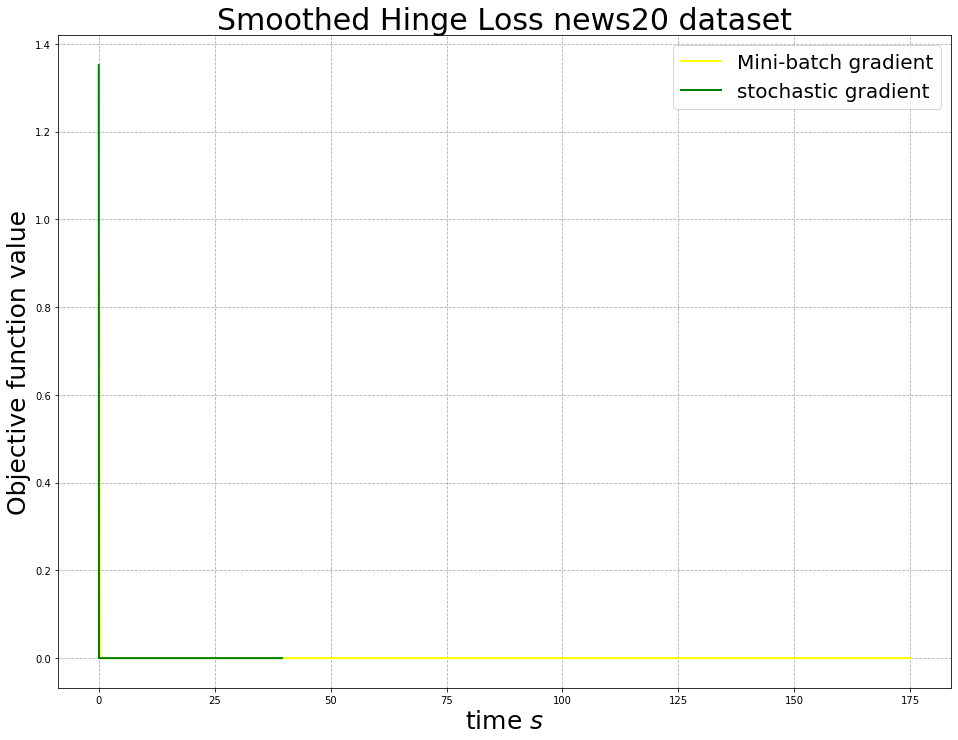

In [107]:
##############################################################################
# Plot Smoothed Hinge Loss
##############################################################################
fig = plt.figure(figsize=(16, 12))
# plt.plot(time_news_hlsgda, loss_news_hlsgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
# plt.plot(time_news_hlsagda, loss_news_hlsagda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_news_hlsmbg, loss_news_hlsmbg, label=("Mini-batch gradient"), linewidth=2.0, color ="yellow")
plt.plot(time_news_hlssg, loss_news_hlssg,label=("stochastic gradient"), linewidth=2.0, color ="green")
plt.plot(time_news_hlsSAG, loss_news_hlsSAG, label=("SAG"), linewidth=2.0, color ="purple")

plt.title('Smoothed Hinge Loss news20 dataset',fontsize=30)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function value", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [97]:
##############################################################################
#Q2 Nonsmoothed Hinge Loss
##############################################################################

In [98]:
import random
x_news_hlnssg, loss_news_hlnssg, time_news_hlnssg = hingeloss_nonsmooth_stochastic_sub_gradient(A_news_training,x0_news,b_news_training,EPSILON,MAX_ITERATION)
print('done...... hingeloss_nonsmooth_stochastic_sub_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlnssg), time_news_hlnssg[-1],loss_news_hlnssg[-1]))

loss_min  1.2009660683516705
done...... hingeloss_nonsmooth_stochastic_sub_gradient
iteration 1001	 time 25.053 	loss 0.003


In [99]:
# x_news_hlnsag, loss_news_hlnsag, time_news_hlnsag = hingeloss_nonsmooth_SAG(A_news_training,x0_news,b_news_training,EPSILON,MAX_ITERATION)
# print('done...... hingeloss_nonsmooth_SAG')
# print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlnsag), time_news_hlnsag[-1],loss_news_hlnsag[-1]))

In [100]:
x_news_hlnmbg,loss_news_hlnmbg,time_news_hlnmbg = hl_nonsmooth_mini_batch_gradient(A_news_training,x0_news,b_news_training,EPSILON,MAX_ITERATION,BATCH_SIZE,False)
print('done...... hl_nonsmooth_mini_batch_gradient')
print('iteration %d\t time %.3f \tloss %.3f'%(len(loss_news_hlnmbg), time_news_hlnmbg[-1],loss_news_hlnmbg[-1]))

1000
done...... hl_nonsmooth_mini_batch_gradient
iteration 1000	 time 25.437 	loss 0.000


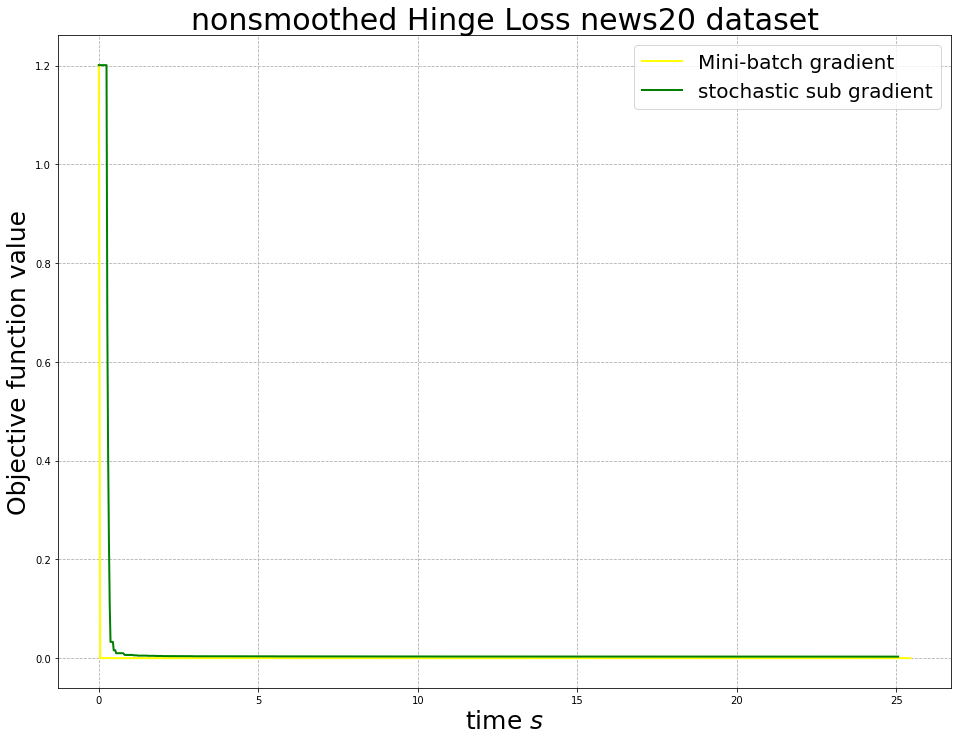

In [101]:
fig = plt.figure(figsize=(16, 12))
# plt.plot(time_hlsgda, loss_hlsgda, label=("Gradient descent with Armijo line search"), linewidth=2.0, color ="blue")
# plt.plot(time_hlsagda, loss_hlsagda, label=("Acceleratd gradient with Armijo line-search"), linewidth=2.0, color ="red")
plt.plot(time_news_hlnmbg, loss_news_hlnmbg, label=("Mini-batch gradient"), linewidth=2.0, color ="yellow")
# plt.plot(time_news_hlnsag, loss_news_hlnsag, label=("SAG"), linewidth=2.0, color ="purple")
plt.plot(time_news_hlnssg, loss_news_hlnssg, label=("stochastic sub gradient"), linewidth=2.0, color ="green")


plt.title('nonsmoothed Hinge Loss news20 dataset',fontsize=30)
plt.legend(prop={'size': 20},loc="upper right")
plt.xlabel("time $s$", fontsize=25)
plt.ylabel("Objective function value", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()